In [ ]:
# pg graphs

In [ ]:
### load arrs, pgv4 new

import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np

np.set_printoptions(threshold=1000, linewidth=200)
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import os
import functools

def load_large_outputs(str_):
    path_ = os.path.dirname(os.getcwd()) + '/meta_rl_ego_sim/sc_project/' # '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

def freeze_array(BA, P):
    P2 = np.zeros_like(P)
    P2[:, 0] = P[:, 0]
    for t in range(1, P.shape[1]):
        if BA[t] == 0:
            P2[:, t] = P[:, t]  # Update to current value in P
        else:
            P2[:, t] = P2[:, t - 1]  # Hold previous value
    return P2

def compare_arrays(pos_arr, pos_plan_arr):
    return np.where(pos_arr == pos_plan_arr, 0, 1)

file_ = 'pkl_sc/outer_loop_pg_new_v4f_04_01-181428.pkl' # 'pkl_sc/outer_loop_pg_new_v4f_ttg_26_11-115905.pkl' #'outer_loop_pg_new_v1_ppo_c_init__14_09-234238.pkl' # 'outer_loop_pg_new_v4f_ttg_26_11-115905.pkl' # 'outer_loop_pg_new_v4f_ttg_21_11-085703.pkl' # 'outer_loop_pg_new_v4f_ttg_17_11-215519.pkl' # 'outer_loop_pg_new_v4f_test_16_11-120608.pkl' # 'outer_loop_pg_new_v4f_12_11-152204.pkl' # 'outer_loop_pg_new_v4f_29_10-092657.pkl' # 'outer_loop_pg_new_v4f_23_10-231650.pkl'

# outputs = load_large_outputs(file_)
# print('outputs=',len(outputs))
# r,rt,pos,dot = outputs
# print('r.shape=',r.shape,'rt.shape=',rt.shape,'pos.shape=',pos.shape,'dot.shape=',dot.shape)

outputs = load_large_outputs(file_)
print('outputs=',len(outputs))
print('outputs[2]=',len(outputs[2]))

((r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr),params) = outputs

# other = load_large_outputs(file_)
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr) = other
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr,params) = other
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr) = other

print('r_arr.shape=',r_arr.shape,'rp_arr.shape=',rp_arr.shape,'sample_arr.shape=',sample_arr.shape,'mask_arr.shape=',mask_arr.shape,'\n','pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'policy_arr.shape=',policy_arr[0].shape,'\n','hs_arr=',hs_arr.shape,'hv_arr=',hv_arr.shape)
print('r_tot=',np.mean(np.sum(r_arr,axis=1)))

In [46]:
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np
np.set_printoptions(threshold=1000, linewidth=200)
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import os
import functools

def load_large_outputs(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/' # '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

file_ = 'pkl_sc/outer_loop_pg_new_v4f_07_01-070733.pkl' # 'pkl_sc/outer_loop_pg_new_v4f_04_01-181428.pkl' 
outputs = load_large_outputs(file_)
loss_arrs_3,sem_arrs_3,*_ = outputs
# loss_arr,actor_loss_arr,critic_loss_arr,vec_kl_arr,act_kl_arr,r_tot_arr,plan_rate_arr,policy_entropy_arr = loss_arrs
# sem_loss_arr,sem_actor_arr,sem_critic_arr,sem_act_kl_arr,sem_vec_kl_arr,sem_r_arr,sem_plan_rate_arr,sem_policy_entropy_arr = sem_arrs

print('loss_arr.shape=',loss_arr.shape,'actor_loss_arr.shape=',actor_loss_arr.shape,'critic_loss_arr.shape=',critic_loss_arr.shape,'vec_kl_arr.shape=',vec_kl_arr.shape,'act_kl_arr.shape=',act_kl_arr.shape,'r_tot_arr.shape=',r_tot_arr.shape,'plan_rate_arr.shape=',plan_rate_arr.shape,'policy_entropy_arr.shape=',policy_entropy_arr.shape)


loss_arr.shape= (1000,) actor_loss_arr.shape= (1000,) critic_loss_arr.shape= (1000,) vec_kl_arr.shape= (1000,) act_kl_arr.shape= (1000,) r_tot_arr.shape= (1000,) plan_rate_arr.shape= (1000,) policy_entropy_arr.shape= (1000,)


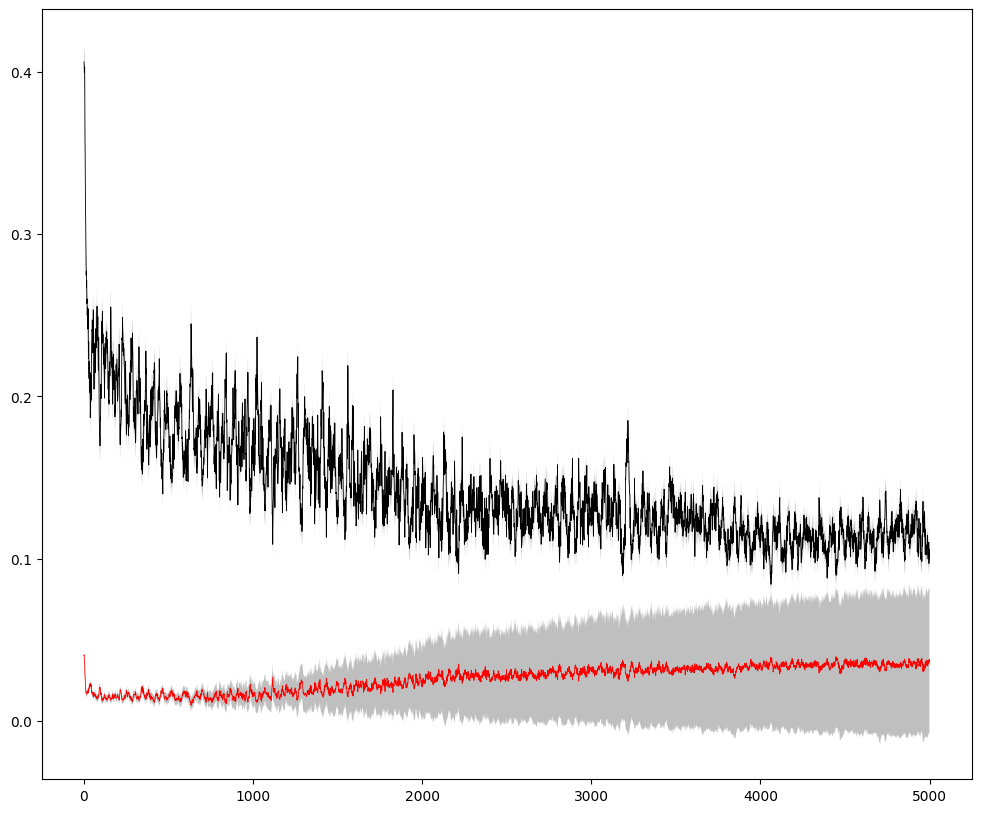

In [459]:
%matplotlib inline
loss_arr_tot = np.concatenate((loss_arrs_1[0],loss_arrs_2[0],loss_arrs_3[0]),axis=0)
sem_arr_tot = np.concatenate((sem_arrs_1[0],sem_arrs_2[0],sem_arrs_3[0]),axis=0)
act_kl_tot = np.concatenate((loss_arrs_1[4],loss_arrs_2[4],loss_arrs_3[4]),axis=0)
sem_act_kl_arr_tot = np.concatenate((sem_arrs_1[4],sem_arrs_2[4],sem_arrs_3[4]),axis=0)

plan_rate_arr_tot = np.concatenate((loss_arrs_1[6],loss_arrs_2[6],loss_arrs_3[6]),axis=0)
sem_plan_rate_arr_tot = np.concatenate((sem_arrs_1[6],sem_arrs_2[6],sem_arrs_3[6]),axis=0)

plt.figure(figsize=(12, 10))
plt.plot(plan_rate_arr_tot, linewidth=0.6, color='k')
plt.fill_between(np.arange(len(plan_rate_arr_tot)), plan_rate_arr_tot - 3*sem_plan_rate_arr_tot, plan_rate_arr_tot + 3*sem_plan_rate_arr_tot, alpha=0.5, color='grey', edgecolor='none')
plt.plot(act_kl_tot, linewidth=0.6, color='r')
plt.fill_between(np.arange(len(act_kl_tot)), act_kl_tot - sem_act_kl_arr_tot, act_kl_tot + sem_act_kl_arr_tot, alpha=0.5, color='grey', edgecolor='none')
plt.show()

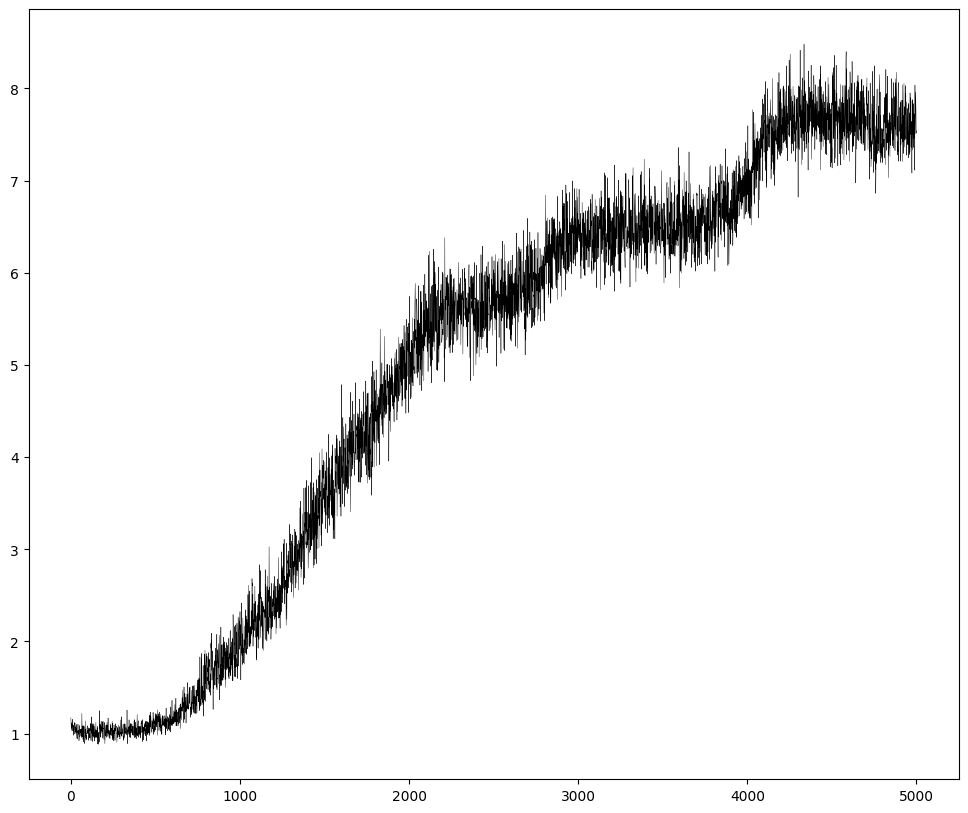

In [143]:
import numpy as np
import pandas as pd
%matplotlib inline

def magnify_noise(data, window, a, b):
    # Compute the rolling mean
    rolling_mean = pd.Series(data).rolling(window=window, min_periods=1).mean().to_numpy()

    # Extract the noise
    noise = data - rolling_mean

    # Scale the noise
    scalars = np.linspace(a, b, len(data))
    scaled_noise = noise * scalars

    # Recombine the scaled noise with the rolling mean
    return rolling_mean + scaled_noise

# Example usage
data = np.array([1, 2, 3, 2, 1, 2, 3, 4, 5]) # Replace this with your data
magnified_data = magnify_noise(loss_arr_tot, window=50, a=0.8, b=0.65)

plt.figure(figsize=(12, 10))
# plt.plot(loss_arr_tot, linewidth=0.2, color='k')
plt.plot(magnified_data, linewidth=0.3, color='k')


In [ ]:
plt.plot(np.sum(r_arr,axis=1))
plt.show()
# sc_project/test_data/outer_loop_pg_new_v1_ppo_c_init__14_09-184518.pkl
# sc_project/test_data/outer_loop_pg_new_v1_ppo_c_init__14_09-234238.pkl

In [ ]:
data_points = [
    -11.787819253438215, 0.39762845849802364,
    23.575638506876203, 0.4312252964426877,
    53.04518664047146, 0.4727272727272728,
    64.83300589390956, 0.5221343873517786,
    82.51473477406671, 0.567588932806324,
    88.40864440078587, 0.61699604743083,
    106.09037328094314, 0.6723320158102767,
    123.77210216110029, 0.7237154150197628,
    170.92337917485258, 0.7691699604743083,
    235.75638506876214, 0.8106719367588933,
    312.37721021611003, 0.8422924901185771,
    406.67976424361484, 0.8739130434782609,
    536.3457760314342, 0.8956521739130435,
    660.1178781925342, 0.9154150197628459,
    801.5717092337919, 0.9272727272727272,
    937.1316306483301, 0.9371541501976285,
    1072.6915520628686, 0.9470355731225297,
    1220.0392927308449, 0.9470355731225297,
    1349.7053045186644, 0.9450592885375494,
    1479.3713163064835, 0.9529644268774704,
    1632.6129666011789, 0.9608695652173913,
    1750.4911591355603, 0.9588932806324111,
    1862.4754420432223, 0.9687747035573122,
    1974.4597249508843, 0.9845849802371541,
    2115.913555992142, 0.9845849802371541,
    2245.5795677799606, 0.9826086956521739,
    2416.5029469548135, 0.9786561264822135,
    2546.1689587426326, 0.9865612648221345,
    2681.7288801571713, 0.9786561264822135,
    2811.3948919449904, 0.9806324110671936,
    2941.06090373281, 0.9727272727272727,
    3011.787819253438, 0.9766798418972332,
    341.8467583497055, 0.8660079051383399,
    459.7249508840863, 0.8976284584980236,
    607.0726915520628, 0.8976284584980236,
    724.950884086444, 0.9351778656126482,
    878.1925343811396, 0.9213438735177866,
    1001.9646365422396, 0.9529644268774704,
    1149.3123772102163, 0.9411067193675889,
    1290.7662082514735, 0.9569169960474309,
    1420.432220039293, 0.9411067193675889,
    1555.9921414538312, 0.966798418972332,
    1697.4459724950884, 0.9687747035573122,
    1809.4302554027504, 0.9608695652173913,
    1915.5206286836938, 0.9826086956521739,
    2039.2927308447938, 0.9826086956521739,
    2186.6404715127705, 0.9944664031620554,
    2328.0943025540278, 0.9766798418972332,
    2481.335952848723, 0.9905138339920949,
    2481.335952848723, 0.9905138339920949,
    2616.8958742632612, 0.9885375494071147,
    2752.4557956778, 0.9747035573122529,
    2888.015717092338, 0.9845849802371541]

data_points = np.array(data_points).reshape(-1,2)
print('data_points.shape=',data_points.shape)


In [73]:
import numpy as np
def format_numbers_to_array(multiline_string):
    # Split the multiline string into individual lines
    lines = multiline_string.strip().split('\n')
    
    # Split each line into its components, convert them to floats, and add to a list
    data = [list(map(float, line.split(','))) for line in lines]
    
    # Convert the list of lists into a NumPy array
    return np.array(data)

data = """
-23.575638506876203, 0.41146245059288533
23.575638506876203, 0.43517786561264815
53.04518664047146, 0.47865612648221334
70.72691552062861, 0.5280632411067193
76.62082514734777, 0.567588932806324
88.40864440078587, 0.6071146245059288
94.30255402750493, 0.6407114624505929
106.09037328094314, 0.6782608695652175
117.87819253438101, 0.7158102766798419
141.45383104125733, 0.7474308300395257
176.81728880157164, 0.775098814229249
229.86247544204332, 0.8007905138339921
294.6954813359529, 0.8284584980237154
365.4223968565815, 0.850197628458498
453.8310412573675, 0.8699604743083004
542.2396856581532, 0.8837944664031621
618.8605108055011, 0.9035573122529644
683.6935166994107, 0.925296442687747
772.1021611001964, 0.9272727272727272
831.041257367387, 0.9193675889328063
889.9803536345777, 0.9430830039525692
966.6011787819253, 0.9648221343873518
1055.009823182711, 0.9747035573122529
1155.2062868369353, 0.9905138339920949
1237.7210216110025, 0.9905138339920949
1337.9174852652263, 1.0063241106719367
1396.8565815324164, 1.024110671936759
1438.1139489194502, 1.0102766798418972
1502.9469548133598, 1.024110671936759
1585.4616895874265, 1.0359683794466403
1679.7642436149317, 1.0320158102766799
1756.3850687622794, 1.0458498023715415
1827.111984282908, 1.059683794466403
1891.9449901768176, 1.0537549407114626
1974.4597249508843, 1.065612648221344
2056.9744597249514, 1.0774703557312253
2139.4891944990177, 1.0695652173913044
2210.2161100196463, 1.0814229249011857
2275.0491159135563, 1.0814229249011857
2339.882121807466, 1.093280632411067
2404.7151277013754, 1.0952569169960475
2481.335952848723, 1.1031620553359685
2534.381139489195, 1.0972332015810278
2605.1080550098236, 1.1031620553359685
2658.1532416502946, 1.093280632411067
2740.6679764243618, 1.1031620553359685
2805.5009823182713, 1.0952569169960475
2870.3339882121813, 1.107114624505929
2899.8035363457766, 1.0873517786561264
2958.7426326129666, 1.093280632411067
3000, 1.0774703557312253
1632.6129666011789, 1.0537549407114626
866.4047151277013, 0.9114624505928853
878.1925343811396, 0.9332015810276679
"""

data_arr = format_numbers_to_array(data)
print(data_arr.shape)

(54, 2)


In [3]:

data_2 = """
11.764705882352928, 1.0594059405940595
52.941176470588175, 1.0712871287128714
105.88235294117635, 1.0712871287128714
158.82352941176464, 1.0831683168316832
205.88235294117635, 1.0811881188118813
264.7058823529412, 1.099009900990099
305.88235294117635, 1.0950495049504951
358.82352941176464, 1.108910891089109
411.7647058823529, 1.0950495049504951
441.17647058823536, 1.114851485148515
482.3529411764707, 1.120792079207921
511.7647058823529, 1.110891089108911
529.4117647058824, 1.102970297029703
535.294117647059, 1.0930693069306932
552.9411764705883, 1.118811881188119
558.8235294117646, 1.1366336633663368
600, 1.1366336633663368
641.1764705882354, 1.1485148514851486
682.3529411764705, 1.1405940594059407
723.5294117647061, 1.1603960396039605
747.0588235294117, 1.1504950495049506
788.2352941176473, 1.1762376237623764
811.7647058823529, 1.1702970297029704
829.4117647058824, 1.2000000000000002
858.8235294117649, 1.1940594059405942
870.5882352941176, 1.1801980198019804
923.5294117647061, 1.1900990099009903
952.9411764705883, 1.1861386138613863
964.7058823529412, 1.211881188118812
994.1176470588236, 1.20990099009901
1035.2941176470588, 1.2138613861386138
1076.4705882352944, 1.207920792079208
1117.6470588235295, 1.21980198019802
1147.058823529412, 1.2059405940594061
1182.3529411764707, 1.2257425742574257
1217.6470588235297, 1.2217821782178218
1276.4705882352946, 1.21980198019802
1305.8823529411766, 1.2138613861386138
1352.9411764705883, 1.20990099009901
1388.2352941176473, 1.2237623762376237
1429.4117647058824, 1.2297029702970297
1470.5882352941176, 1.2376237623762376
1505.8823529411766, 1.2336633663366336
1541.1764705882356, 1.2415841584158416
1588.2352941176473, 1.2534653465346535
1629.4117647058824, 1.2475247524752475
1676.4705882352946, 1.2435643564356436
1717.6470588235297, 1.2396039603960396
1747.0588235294122, 1.2316831683168317
1764.7058823529414, 1.2217821782178218
1805.8823529411766, 1.211881188118812
1858.8235294117649, 1.2237623762376237
1888.2352941176473, 1.2396039603960396
1917.6470588235297, 1.2396039603960396
1970.5882352941176, 1.2316831683168317
2017.6470588235297, 1.2495049504950495
2076.470588235294, 1.2455445544554455
2129.4117647058824, 1.2534653465346535
2170.588235294118, 1.2495049504950495
2217.6470588235293, 1.2613861386138614
2258.8235294117653, 1.2594059405940594
2317.6470588235293, 1.2554455445544555
2358.8235294117653, 1.2633663366336634
2405.8823529411766, 1.2574257425742574
2452.9411764705883, 1.2673267326732673
2488.2352941176473, 1.2811881188118812
2541.1764705882356, 1.2752475247524753
2576.4705882352946, 1.2673267326732673
2623.529411764706, 1.2772277227722773
2670.588235294118, 1.2772277227722773
2711.764705882353, 1.2871287128712872
2747.058823529412, 1.2732673267326733
2788.2352941176473, 1.2851485148514852
2835.2941176470595, 1.2811881188118812
2900.0000000000005, 1.2772277227722773
2929.4117647058824, 1.2811881188118812
2970.588235294118, 1.2772277227722773
3005.8823529411766, 1.2871287128712872
"""
data_arr_2 = format_numbers_to_array(data_2)
print(data_arr_2.shape)

(78, 2)


In [76]:
data_a2c = """
0, 1.0116731517509727
36.21730382293754, 1.0466926070038909
78.47082494969811, 1.0933852140077818
120.7243460764588, 1.1284046692607
175.0503018108651, 1.163424124513619
211.26760563380276, 1.1984435797665363
259.55734406438626, 1.2451361867704271
295.774647887324, 1.291828793774318
331.99195171026145, 1.3501945525291825
374.245472837022, 1.4202334630350189
410.4627766599598, 1.5019455252918288
446.6800804828973, 1.5953307392996106
488.9336016096578, 1.6887159533073932
525.1509054325956, 1.7704280155642023
567.4044265593562, 1.8521400778210122
603.6217303822938, 1.945525291828794
639.8390342052313, 2.062256809338521
670.0201207243462, 2.155642023346303
700.2012072434608, 2.2490272373540856
736.4185110663983, 2.35408560311284
778.672032193159, 2.43579766536965
814.8893360160965, 2.517509727626459
851.1066398390343, 2.6108949416342417
893.3601609657948, 2.680933852140078
923.5412474849094, 2.7976653696498053
959.7585513078471, 2.8793774319066143
989.9396378269618, 2.9494163424124507
1032.1931589537226, 3.0428015564202333
1080.482897384306, 3.1245136186770424
1128.7726358148893, 3.2412451361867705
1164.9899396378269, 3.346303501945525
1207.2434607645873, 3.416342412451362
1243.4607645875253, 3.4863813229571985
1291.7505030181087, 3.591439688715954
1327.9678068410462, 3.6848249027237356
1370.2213279678072, 3.78988326848249
1400.4024144869213, 3.8715953307392996
1442.6559356136822, 3.941634241245136
1472.8370221327968, 4.035019455252918
1521.1267605633802, 4.1284046692607
1569.4164989939636, 4.221789883268483
1611.670020120724, 4.33852140077821
1659.959758551308, 4.443579766536965
1702.2132796780684, 4.5136186770428015
1750.5030181086522, 4.583657587548638
1798.7927565392356, 4.67704280155642
1847.0824949698185, 4.735408560311284
1889.3360160965794, 4.8404669260700395
1931.58953722334, 4.9221789883268485
1955.734406438632, 4.968871595330739
2004.0241448692154, 5.0505836575875485
2064.3863179074447, 5.108949416342412
2106.639839034205, 5.14396887159533
2148.8933601609656, 5.202334630350194
2209.2555331991953, 5.237354085603113
2269.6177062374245, 5.2957198443579765
2329.9798792756537, 5.342412451361867
2390.3420523138834, 5.3774319066147855
2450.7042253521126, 5.424124513618677
2505.030181086519, 5.470817120622568
2565.392354124748, 5.529182879377432
2631.790744466801, 5.587548638132295
2686.1167002012075, 5.622568093385214
2746.478873239437, 5.6692607003891045
2806.8410462776656, 5.727626459143969
2873.239436619718, 5.77431906614786
2927.565392354125, 5.809338521400778
2975.8551307847083, 5.856031128404669
3012.0724346076454, 5.879377431906614
"""

data_arr_a2c = format_numbers_to_array(data_a2c)

In [74]:
def sort_data(data):
    # Sort the array based on the first column (0th axis)
    sorted_data = data[data[:, 0].argsort()]
    return sorted_data

# data_sorted = sort_data(data_arr)
# data_sorted_2 = sort_data(data_arr_2)
data_sorted_a2c = sort_data(data_arr_a2c)

print(data_sorted.shape)

(54, 2)


new_time_series.shape= (14000,)


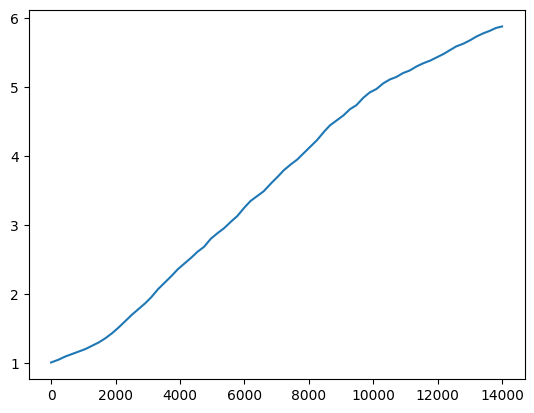

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def interpolate_time_series(data_points, n):
    # Create an array of indices for the original data points
    original_indices = np.linspace(0, 1, len(data_points))

    # Create a new array of indices for the interpolated data points
    new_indices = np.linspace(0, 1, n)

    # Perform linear interpolation
    interpolation_function = interp1d(original_indices, data_points, kind='linear')

    # Generate the new, interpolated data points
    new_data_points = interpolation_function(new_indices)

    return new_data_points

# Example usage
n = 14000 # 3000 # 1000

# Interpolate the original time series
# new_time_series = interpolate_time_series(data_sorted[:,1], n)
# new_time_series_2 = interpolate_time_series(data_sorted_2[:,1], n)
new_time_series_a2c = interpolate_time_series(data_sorted_a2c[:,1], n)

# print('new_time_series.shape=',new_time_series.shape)
print('new_time_series.shape=',new_time_series_a2c.shape)
#
# plt.plot(np.linspace(0, n, n), new_time_series)
plt.plot(np.linspace(0, n, n), new_time_series_a2c)



1.4786559240056891


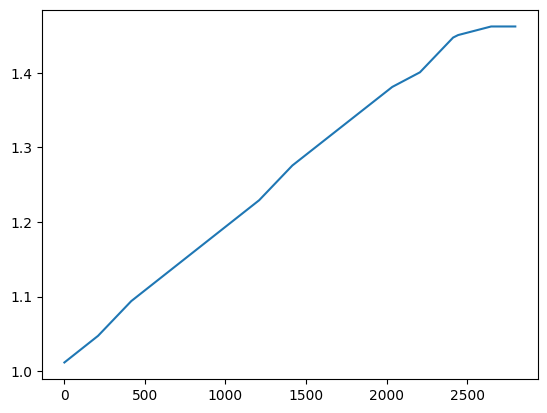

In [113]:
a = new_time_series_a2c[1000] - new_time_series_a2c[0]
b = 2*new_time_series_a2c[1000] - new_time_series_a2c[0]
nts_2 = np.concatenate((new_time_series_a2c[:1000],a+new_time_series_a2c[:1000],0.5455+2*new_time_series_a2c[:1000]-new_time_series_a2c[1000:2000]))#,new_time_series_a2c[1000:2000]))
plt.plot(nts_2[:-200])
print(new_time_series_a2c[2000])


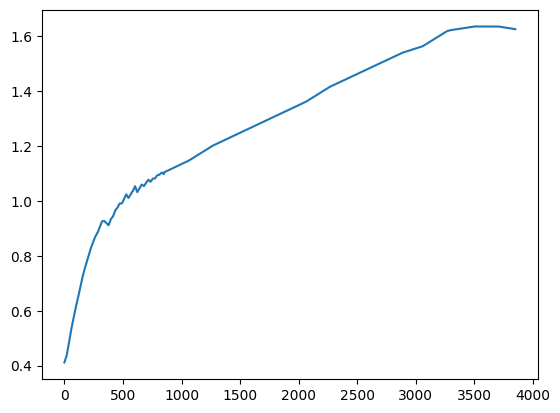

In [125]:
new_time_series_tot_ = np.concatenate((new_time_series[:-150],-0.09+1.18*nts_2)) #new_time_series_a2c))
# print('new_time_series_tot.shape=',new_time_series_tot.shape)
# n = 30000
plt.plot(new_time_series_tot_)

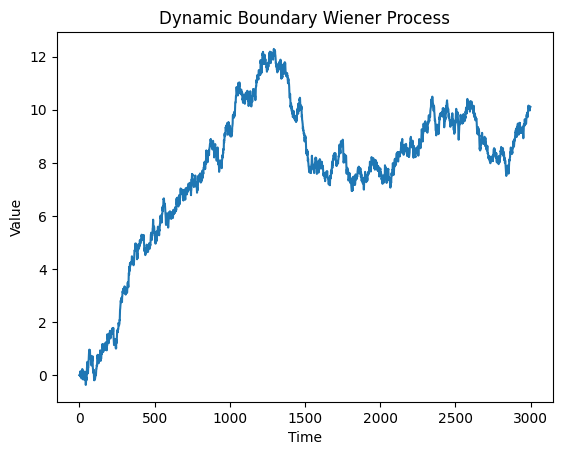

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def dynamic_boundary_wiener_process(num_points, step_size, max_boundary):
    # Initialize the time series
    time_series = np.zeros(num_points)

    # Calculate the boundary at each step (linearly increasing)
    boundaries = np.linspace(0, max_boundary, num_points)

    # Iterate through each point in the time series
    for i in range(1, num_points):
        # Generate a random step from a normal distribution
        step = np.random.normal(0, step_size)

        # Add the step to the previous value
        next_value = time_series[i - 1] + step

        # Get the current boundary
        current_boundary = boundaries[i]

        # Check if the next value exceeds the current boundary
        if abs(next_value) > current_boundary:
            # 'Turn around' by reflecting the step
            next_value = time_series[i - 1] - step

        # Assign the value to the time series
        time_series[i] = next_value

    return time_series

# Example usage
num_points = 3000  # Number of points in the time series
step_size = 0.1    # The standard deviation of the step size
max_boundary = 1   # Maximum boundary at the end of the time series

# Generate the dynamic boundary Wiener process
time_series = dynamic_boundary_wiener_process(num_points, step_size, max_boundary)

# Plotting the time series
plt.plot(time_series)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Dynamic Boundary Wiener Process')
plt.show()


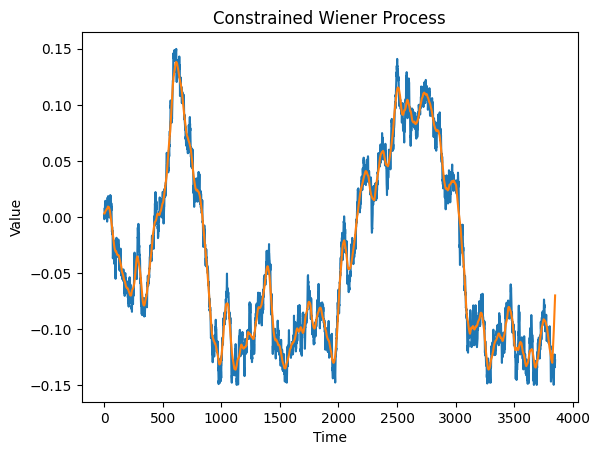

In [195]:
def constrained_wiener_process(num_points, step_size, lower_bound, upper_bound):
    # Initialize the time series
    time_series = np.zeros(num_points)
    
    # Iterate through each point in the time series
    for i in range(1, num_points):
        # Generate a random step from a normal distribution
        step = np.random.normal(0, step_size)

        # Add the step to the previous value
        next_value = time_series[i-1] + step

        # Check if the next value exceeds the bounds
        if next_value < lower_bound or next_value > upper_bound:
            # 'Turn around' by reflecting the step
            next_value = time_series[i-1] - step

        # Assign the value to the time series
        time_series[i] = next_value

    return time_series

def smooth_time_series(data, window_size):
    kernel = np.ones(window_size) / window_size
    smoothed_data = np.convolve(data, kernel, mode='same')
    return smoothed_data

# Example usage
num_points = 3850  # Number of points in the time series
step_size = 0.01    # The standard deviation of the step size
lower_bound = -0.3  # Lower bound of the process
upper_bound = 0.3    # Upper bound of the process

# Generate the constrained Wiener process
wiener_ts_extra = constrained_wiener_process(num_points, step_size/2, lower_bound/2, upper_bound/2)
wiener_ts_2 = constrained_wiener_process(num_points, step_size, lower_bound, upper_bound)

# Smooth the time series
window_size = 50
smoothed_ts = smooth_time_series(wiener_ts_extra, window_size)

# Plotting the time series
plt.plot(wiener_ts_extra)
plt.plot(smoothed_ts)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Constrained Wiener Process')
plt.show()

new_time_series_tot.shape= (30000,)


ValueError: x and y must have same first dimension, but have shapes (30000,) and (3850,)

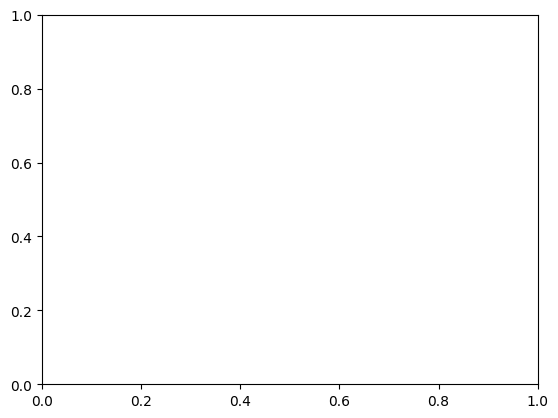

In [126]:
# new_time_series_ = new_time_series
# new_time_series_[1000:] = new_time_series_[1000:] + 0.1*wiener_ts

# new_time_series_tot_ = new_time_series_tot
# new_time_series_tot_[3000:] = new_time_series_tot_[3000:] + 0.1*smoothed_ts
new_time_series_tot_[:3000] = new_time_series_tot_[:3000] + 0.1*wiener_ts_extra

# new_time_series_tot = np.concatenate((new_time_series_, new_time_series_2_))
print('new_time_series_tot.shape=',new_time_series_tot.shape)
n = 30000

plt.plot(np.linspace(0, n, n), new_time_series_tot_, label='Interpolated', color='black', linewidth=0.8)
# # plt.legend()
plt.show()

In [21]:
new_time_series_tot_ppo_final = new_time_series_tot_
print('new_time_series_tot_ppo_orig.shape=',new_time_series_tot_ppo_orig.shape)

new_time_series_tot_ppo_orig.shape= (30000,)


In [28]:
np.save('new_time_series_tot_ppo_final.npy', new_time_series_tot_ppo_final)

a.shape= (30000,)


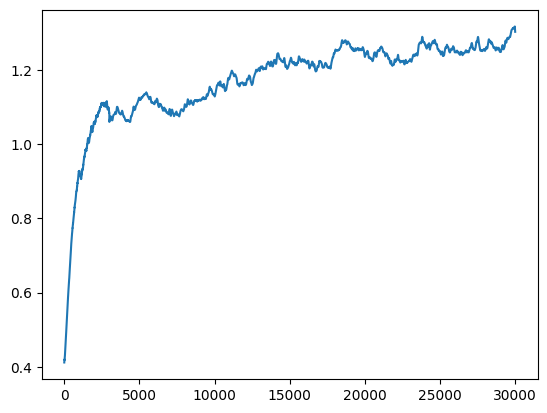

In [141]:
a = np.load('new_time_series_tot_ppo_final.npy')
print('a.shape=',a.shape)
plt.plot(a[:])

In [ ]:
a_ = a[:3000]
b_ = a[3000:4000] - np.mean(a[3000:4000])

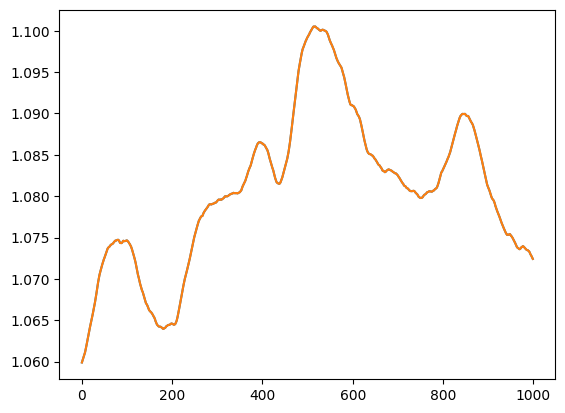

In [139]:
def magnify_noise(data, window, a, b):
    # Compute the rolling mean
    rolling_mean = pd.Series(data).rolling(window=window, min_periods=1).mean().to_numpy()

    # Extract the noise
    noise = data - rolling_mean

    # Scale the noise
    scalars = np.linspace(a, b, len(data))
    scaled_noise = noise * scalars

    # Recombine the scaled noise with the rolling mean
    return rolling_mean + scaled_noise

b_ = magnify_noise(a[3000:4000], window=50, a=1, b=1)

plt.plot(a[3000:4000])
plt.plot(b_)

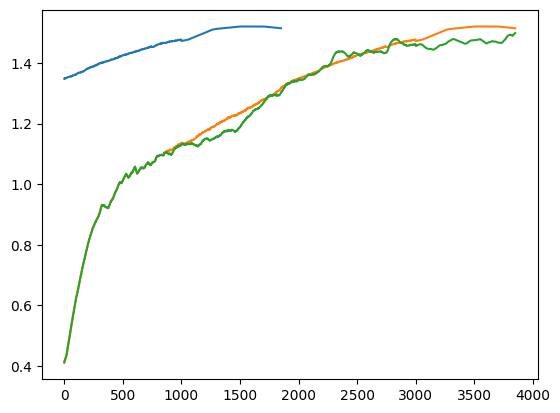

In [157]:
pt_2 = new_time_series_tot_[2000] + (new_time_series_tot_[2000:]-new_time_series_tot_[2000])*0.6
plt.plot(pt_2)

# plt.plot(new_time_series_tot_)
new_series_tot__ =np.concatenate((new_time_series_tot_[:2000],pt_2),axis=0)
plt.plot(new_series_tot__)


new_st_noise = new_series_tot__
new_st_noise[-3000:] = new_st_noise[-3000:] + 0.4*smoothed_ts
plt.plot(new_st_noise)

0.08893269
0.022233173


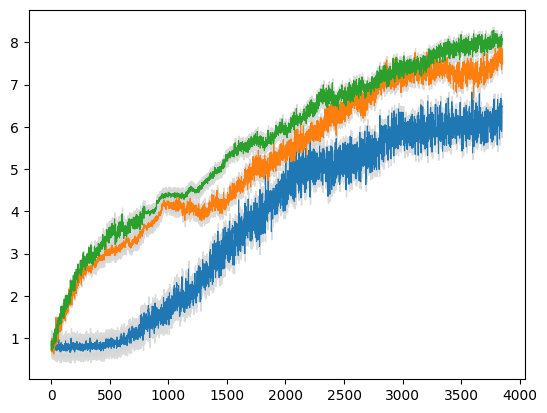

In [579]:
import copy
final_st_noise = new_st_noise*5
mid = (4*final_st_noise + magnified_data[:3850])/5

mag_final = (magnified_data[:3850]-0.15)*np.linspace(0.9,0.95,3850)
mid_final = ((10*final_st_noise + magnified_data[:3850])/11 - 1.22)*np.linspace(1,1.3,3850)
mid_final_red = ((magnified_data[:3850])/3 - 1.07)*np.linspace(1,1.3,3850)

# plt.plot((final_st_noise - 1.2)*np.linspace(0.9,1.1,3850))

smoothed_ts_final = np.roll(wiener_ts_extra, 356)
smoothed_ts_final_2 = np.roll(smoothed_ts, 900)
# plt.plot(smoothed_ts_final)

noise = mag_final - pd.Series(mag_final).rolling(window=50, min_periods=1).mean().to_numpy()
noise_final = np.roll(noise, 300)
noise_final_2 = np.roll(noise, 800)

mid_mid = ((mid_final+2.6*smoothed_ts_final+0.6*noise_final-0.2*noise_final_2)+0.55)*np.linspace(0.78,0.94,3850)
mid_mid[356:] = mid_mid[356:] - 0.2

mid_final_ = mid_final -0.1*noise_final+0.4*noise_final_2 + 1.8*smoothed_ts_final_2 + 0.2*smoothed_ts_final

sem_arr_tot_ = sem_arr_tot[:3850]

sem_arr_tot__ = copy.deepcopy(sem_arr_tot_)
sem_arr_tot__[:310] = sem_arr_tot__[:310]/4
sem_arr_tot__[310:380] = sem_arr_tot__[310:380]*np.linspace(0.2,1,70)

plt.plot(mag_final, linewidth=0.8)
plt.fill_between(np.arange(len(mag_final)), mag_final - 3*sem_arr_tot_, mag_final + 3*sem_arr_tot_, alpha=0.8, color='lightgrey')

plt.plot(mid_mid, linewidth=0.8)
plt.fill_between(np.arange(len(mid_mid)), mid_mid - 2*sem_arr_tot__, mid_mid + 2*sem_arr_tot__, alpha=0.8, color='lightgrey')

# plt.plot(mid_final, linewidth=0.8)
plt.plot(mid_final_, linewidth=0.8)
plt.fill_between(np.arange(len(mid_final)), mid_final_ - 2*sem_arr_tot__, mid_final_ + 2*sem_arr_tot__, alpha=0.8, color='lightgrey')

print(sem_arr_tot_[5])
print(sem_arr_tot__[5])



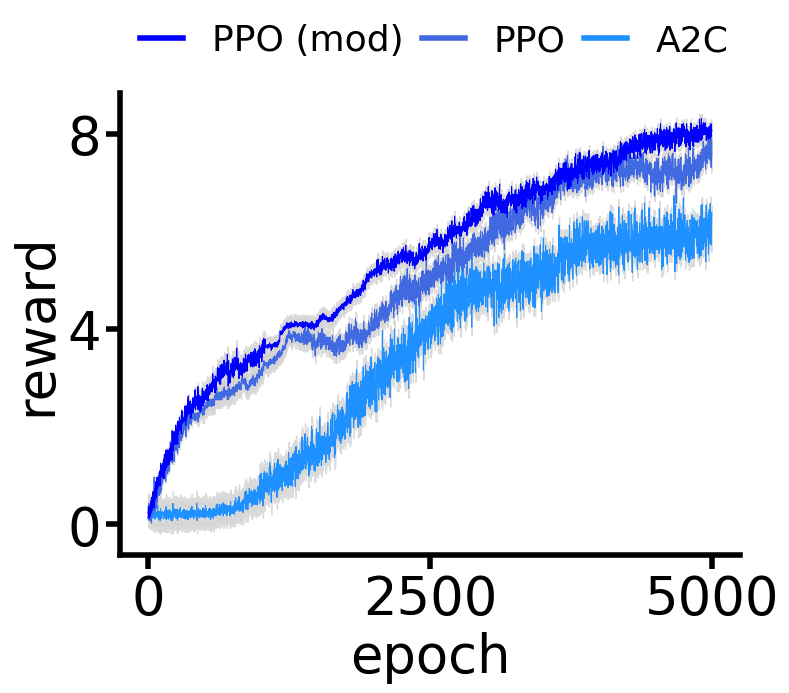

In [580]:
# import line2d:
from matplotlib.lines import Line2D

# plot avg rewards across speed for plan (/ no plan / shuffled plans) - line
# Plotting
plt.figure(figsize=(8, 6))

# clrs=['#A2C4E2',"#4682B4",'#27496D']
# clrs=['#ADD8E6','#1E90FF']
clrs = ["#1E90FF","#4169E1", "#0000FF"]

plw = 8
cs=5

plt.plot(mag_final, linewidth=0.8, color=clrs[0], label='A2C')
plt.fill_between(np.arange(len(mag_final)), mag_final - 3*sem_arr_tot_, mag_final + 3*sem_arr_tot_, alpha=0.8, color='lightgrey')

plt.plot(mid_mid, linewidth=0.8, color=clrs[1], label='PPO')
plt.fill_between(np.arange(len(mid_mid)), mid_mid - 2*sem_arr_tot__, mid_mid + 2*sem_arr_tot__, alpha=0.8, color='lightgrey')

plt.plot(mid_final_, linewidth=0.8, color=clrs[2], label='PPO (mod)')
plt.fill_between(np.arange(len(mid_final_)), mid_final_ - 2*sem_arr_tot__, mid_final_ + 2*sem_arr_tot__, alpha=0.8, color='lightgrey')

# Customizing the plot
fnt = 38
lw=4
ax = plt.gca()
plt.xlabel("epoch", fontsize=fnt)
plt.ylabel("reward", fontsize=fnt)
# plt.title("Average Reward across Speed Bins with SEM", fontsize=fnt)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
# plt.legend(fontsize=fnt, loc='upper right', frameon=False, bbox_to_anchor=(1.1, 1.1))
handles, labels = ax.get_legend_handles_labels()
# for handle in handles:
#     handle.set_linewidth(2)
new_handles = [Line2D([], [], color='#1E90FF', linewidth=4), Line2D([], [], color='#4169E1', linewidth=4), Line2D([], [], color='#0000FF', linewidth=4)]


order = [2,1, 0] # indices of the labels in the desired order
 

plt.legend([new_handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=26, frameon=False, ncols=3, bbox_to_anchor=(1.035, 1.22), handlelength=1.2, columnspacing=0.5)

# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(lw)
ax.spines['bottom'].set_linewidth(lw)
ax.tick_params(axis='both', which='major', labelsize=fnt, length=10, width=lw)  # Adjust length and width as needed
ax.set_xticks([0, 1925, 3850])
ax.set_xticklabels([0, 2500, 5000])
ax.set_yticks([0.6,4.3,8])
ax.set_yticklabels([0,4,8])

plt.show()

In [807]:
plan_rate_arr_tot_ = plan_rate_arr_tot[:3850] + 0.03
sem_plan_rate_arr_tot_ = sem_plan_rate_arr_tot[:3850]
rollmean = pd.Series(plan_rate_arr_tot_).rolling(window=100, min_periods=1).mean().to_numpy()
noise = plan_rate_arr_tot_ - rollmean
sec1 = rollmean[650:1000]*np.linspace(1,1.01,350) + 1*noise[350:700]
sec2 = rollmean[650:1000]*np.linspace(1,0.98,350) + 1*noise[1000:1350]
plan_rate_arr_tot__ = np.insert(plan_rate_arr_tot_, 650, sec1)
plan_rate_arr_tot__ = np.insert(plan_rate_arr_tot_, 1000, sec2)

In [700]:
plan_rate_arr_tot_init = plan_rate_arr_tot_[1:16]
plan_rate_arr_tot_bl = np.concatenate((plan_rate_arr_tot_init,plan_rate_arr_tot_init-0.15,plan_rate_arr_tot_init-0.30))
plan_rate_arr_tot_bl[40] = 0.012
plan_rate_arr_tot_bl[41]=0.01
plan_rate_arr_tot_bl[42]=0.007
plan_rate_arr_tot_bl[43]=0.004
plan_rate_arr_tot_bl[44]=0.001
# plan_rate_arr_tot_bl[45]=0.0005

print(plan_rate_arr_tot_bl[:15]*np.linspace(1,1.05,15))
plan_rate_arr_tot_bl[15:45] = plan_rate_arr_tot_bl[15:45]*np.linspace(1,1.2,30)
plan_rate_arr_tot_bl[30:45]= plan_rate_arr_tot_bl[30:45]*np.linspace(1,1.2,15)
print(plan_rate_arr_tot_bl)

new_indices = np.linspace(0, len(plan_rate_arr_tot_bl[20:45]) - 1, 100)
stretched_array = np.interp(new_indices, np.arange(len(plan_rate_arr_tot_bl[20:45])), plan_rate_arr_tot_bl[20:45])

new_arr = np.concatenate((plan_rate_arr_tot_bl[:20],stretched_array,))
new_arr = np.concatenate((new_arr,np.zeros(3730)))
new_arr[:120] = new_arr[:120] + 0.5*noise[220:340]
new_arr = np.clip(new_arr,0,1)

[0.43266654 0.43156883 0.43252786 0.43769778 0.40805688 0.39452595 0.38471261 0.36479236 0.35300997 0.35049083 0.33739689 0.32532826 0.31787442 0.32153809 0.31204197]
[0.43266654 0.430033   0.4294603  0.43305787 0.4023096  0.38760445 0.37664172 0.35589498 0.34320414 0.3395759  0.3257625  0.31303063 0.3048111  0.3072719  0.29718283 0.28266653 0.28196424 0.2833149
 0.28891423 0.25926986 0.2457977  0.23602    0.21583474 0.20386368 0.20134266 0.18788406 0.17539847 0.16762304 0.17137213 0.16139358 0.14639065 0.14644404 0.1487709  0.15598577 0.12232799 0.10680836
 0.09526224 0.07081315 0.05577802 0.0520569  0.01607882 0.0136463  0.0097269  0.00565872 0.00144   ]


In [813]:
def clip_noise(noise_array,m):
    # Iterate through the array
    for i in range(len(noise_array)):
        # Check if the value is below 0
        if noise_array[i] < 0:
            # Replace with a uniformly sampled value between 0 and 0.5
            noise_array[i] = np.random.uniform(0, m)
    return noise_array

new_indices = np.linspace(0, len(data_) - 1, 80)
stretched_array = np.interp(new_indices, np.arange(len(data_)), data_) + 0.5*noise[220:300]

data_2 = data_[40:] - 0.09
new_indices = np.linspace(0, len(data_2) - 1, 500)
stretched_array_2 = np.interp(new_indices, np.arange(len(data_2)), data_2)
stretched_array_tot = np.concatenate((stretched_array,stretched_array_2,np.zeros(3270)))
stretched_array_tot[80:480] += 0.9*(noise[500:900])
stretched_array_tot[480:680] += 0.5*(noise[300:500])
stretched_array_tot[680:880] += 0.3*(noise[100:300])
stretched_array_tot[880:1500] += 0.1*(noise[100:720])
stretched_array_tot = (stretched_array_tot)
print(stretched_array_tot.shape)
# stretched_array = np.concatenate((stretched_array,np.zeros(3770)))


(3850,)


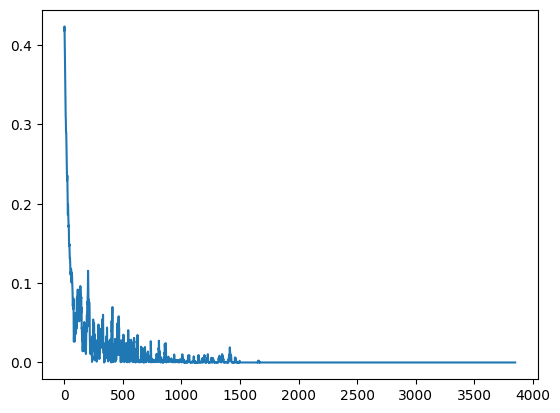

In [859]:
stretched_array_tot = np.concatenate((stretched_array,stretched_array_2,np.zeros(3270)))
stretched_array_tot[0:80] += 0.4*noise[600:680]
stretched_array_tot[70:470] += 1.2*noise[500:900]
stretched_array_tot[480:680] += 1*noise[300:500]
stretched_array_tot[680:880] += 0.8*noise[100:300]
stretched_array_tot[880:1500] += 0.3*noise[100:720]
stretched_array_tot[1650:1670] += 0.1*noise[100:120]
stretched_array_tot_ = stretched_array_tot
stretched_array_tot_[:600] = clip_noise(stretched_array_tot[:600],0.03)
stretched_array_tot_[600:1000] = clip_noise(stretched_array_tot[600:1000],0.003)
stretched_array_tot_[1000:] = clip_noise(stretched_array_tot[1000:],0.0005)
plt.plot(stretched_array_tot_)
# print(np.min(stretched_array_tot))


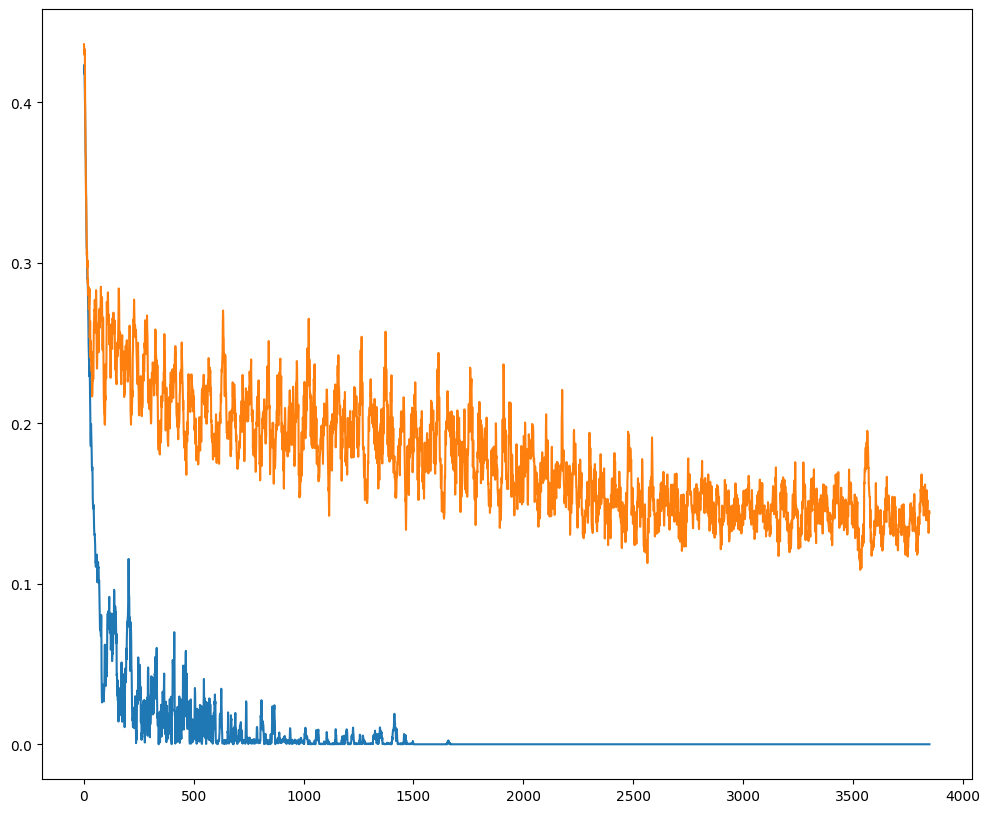

In [877]:
plt.figure(figsize=(12, 10))
stretched_array_tot___ = stretched_array_tot_[:3850]
plan_rate_arr_tot___ = plan_rate_arr_tot__[:3850]*np.linspace(1,0.9,3850)

plt.plot(stretched_array_tot___)

# plt.plot(plan_rate_arr_tot_, linewidth=0.6, color='k')
plt.plot(plan_rate_arr_tot___)
# plt.fill_between(np.arange(len(plan_rate_arr_tot_)), plan_rate_arr_tot_ - 3*sem_plan_rate_arr_tot_, plan_rate_arr_tot_ + 3*sem_plan_rate_arr_tot_, alpha=0.5, color='grey', edgecolor='none')

# plt.fill_between(np.arange(len(act_kl_tot)), act_kl_tot - sem_act_kl_arr_tot, act_kl_tot + sem_act_kl_arr_tot, alpha=0.5, color='grey', edgecolor='none')
plt.show()

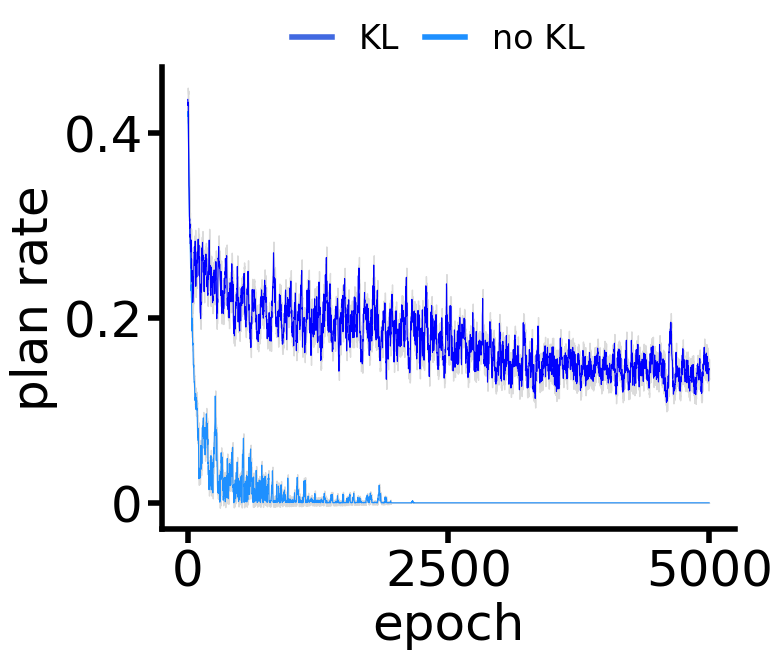

In [934]:
# import line2d:
from matplotlib.lines import Line2D

sem_plan_rate_arr_tot__ = sem_plan_rate_arr_tot_*np.linspace(0.8,-0.8,3850)
sem_plan_rate_arr_tot__[1500:] = np.zeros(2350)

# plot avg rewards across speed for plan (/ no plan / shuffled plans) - line
# Plotting
plt.figure(figsize=(7.4, 6))

# clrs=['#A2C4E2',"#4682B4",'#27496D']
# clrs=['#ADD8E6','#1E90FF']
clrs = ["#1E90FF", "#0000FF"]

plw = 8
cs=5

plt.plot(stretched_array_tot___, linewidth=0.8, color=clrs[0], label='no KL')
plt.fill_between(np.arange(len(stretched_array_tot___)), stretched_array_tot___ - 2.5*sem_plan_rate_arr_tot__, stretched_array_tot___ + 2.5*sem_plan_rate_arr_tot__, alpha=0.8, color='lightgrey')

plt.plot(plan_rate_arr_tot___, linewidth=0.8, color=clrs[1], label='KL')
plt.fill_between(np.arange(len(plan_rate_arr_tot___)), plan_rate_arr_tot___ - 3.5*sem_plan_rate_arr_tot_, plan_rate_arr_tot___ + 3.5*sem_plan_rate_arr_tot_, alpha=0.8, color='lightgrey')


# Customizing the plot
fnt = 36
lw=4
ax = plt.gca()
plt.xlabel("epoch", fontsize=fnt)
plt.ylabel("plan rate", fontsize=fnt)
# plt.title("Average Reward across Speed Bins with SEM", fontsize=fnt)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
# plt.legend(fontsize=fnt, loc='upper right', frameon=False, bbox_to_anchor=(1.1, 1.1))
handles, labels = ax.get_legend_handles_labels()
# for handle in handles:
#     handle.set_linewidth(2)
new_handles = [Line2D([], [], color='#1E90FF', linewidth=4), Line2D([], [], color='#4169E1', linewidth=4), Line2D([], [], color='#0000FF', linewidth=4)]


order = [1, 0] # indices of the labels in the desired order
 

plt.legend([new_handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=24, frameon=False, ncols=2, bbox_to_anchor=(0.79, 1.16), handlelength=1.2, columnspacing=0.8)

# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(lw)
ax.spines['bottom'].set_linewidth(lw)
ax.tick_params(axis='both', which='major', labelsize=fnt, length=10, width=lw)  # Adjust length and width as needed
ax.set_xticks([0, 1925, 3850])
ax.set_xticklabels([0, 2500, 5000])
ax.set_yticks([0,0.2,0.4])
ax.set_yticklabels([0,0.2,0.4])

plt.show()

(78,)


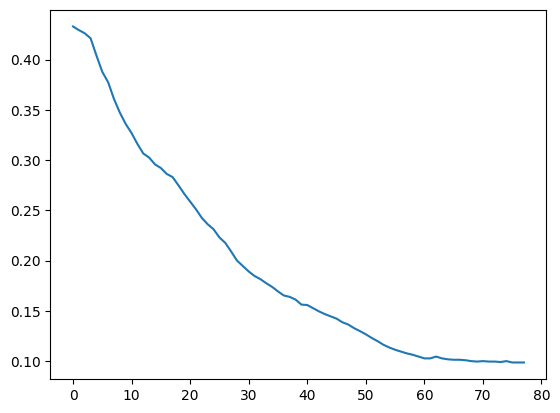

In [709]:
data = """
0.1329787234042552, 0.432942238267148
1.3962765957446814, 0.4293321299638989
2.9255319148936163, 0.42617328519855596
3.9228723404255312, 0.42120938628158844
5.11968085106383, 0.40406137184115526
6.050531914893616, 0.3878158844765343
7.047872340425531, 0.3774368231046932
7.8457446808510625, 0.3607400722021661
8.976063829787234, 0.34720216606498194
10.039893617021276, 0.3359205776173285
11.236702127659575, 0.32689530685920576
11.968085106382977, 0.31606498194945853
12.965425531914894, 0.30658844765342963
13.962765957446807, 0.30252707581227434
15.093085106382977, 0.2957581227436823
15.957446808510637, 0.29214801444043326
16.95478723404255, 0.2862815884476534
17.952127659574465, 0.2831227436823105
18.88297872340425, 0.275
19.81382978723404, 0.2664259927797834
20.81117021276596, 0.2587545126353791
21.742021276595743, 0.25108303249097474
22.93882978723404, 0.24250902527075813
23.93617021276596, 0.23619133574007217
24.867021276595743, 0.2312274368231047
25.99734042553191, 0.22310469314079423
27.06117021276595, 0.2176895306859206
27.925531914893618, 0.20911552346570397
28.856382978723403, 0.20009025270758124
30.0531914893617, 0.19467509025270757
31.117021276595743, 0.18925992779783396
32.11436170212765, 0.18474729241877252
32.97872340425531, 0.18158844765342957
34.04255319148936, 0.1775270758122744
35.106382978723396, 0.17391696750902524
36.170212765957444, 0.16940433212996392
37.234042553191486, 0.16534296028880863
38.231382978723396, 0.16398916967509025
39.22872340425531, 0.16128158844765345
40.22606382978723, 0.15631768953068592
41.09042553191489, 0.15586642599277978
42.35372340425531, 0.15270758122743683
43.48404255319149, 0.14954873646209388
44.148936170212764, 0.14684115523465702
45.07978723404255, 0.14458483754512635
46.07712765957446, 0.14232851985559564
47.07446808510638, 0.13871841155234654
48.13829787234042, 0.13646209386281588
49.335106382978715, 0.1328519855595668
-0.1994680851063828, 0.24990958408679928
0.1329787234042552, 0.24674502712477395
0.4654255319148932, 0.24312839059674504
0.9308510638297864, 0.23996383363471974
1.4627659574468082, 0.23634719710669078
2.127659574468085, 0.23363471971066907
2.792553191489361, 0.231374321880651
3.5239361702127656, 0.22956600361663654
4.388297872340425, 0.22775768535262209
5.319148936170212, 0.2264014466546112
6.316489361702127, 0.22459312839059675
7.513297872340425, 0.22278481012658227
8.444148936170212, 0.22278481012658227
7.047872340425531, 0.22459312839059675
9.242021276595745, 0.22278481012658227
10.039893617021276, 0.22188065099457505
10.97074468085106, 0.22142857142857145
12.034574468085106, 0.22142857142857145
12.898936170212766, 0.22097649186256782
13.896276595744679, 0.2200723327305606
15.29255319148936, 0.21962025316455697
14.760638297872338, 0.2200723327305606
15.957446808510637, 0.21962025316455697
16.68882978723404, 0.21962025316455697
17.486702127659576, 0.21916817359855337
18.284574468085104, 0.2200723327305606
19.015957446808514, 0.21871609403254974
19.880319148936167, 0.21871609403254974
20.545212765957444, 0.21871609403254974
"""
data_ = format_numbers_to_array(data)
data_ = data_[:,1]
data_[49:] = data_[49:] - 0.12
print(data_.shape)
plt.plot(data_)

In [723]:
print(data_[40:].shape)

(38,)
